In [2]:
# Importing libraries and cleaned data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
df = pd.read_csv('data/data_clean.csv')

In [ ]:
df.columns

In [23]:
pair = [
    'price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'population',
    'density', 'yr_built', 'yr_renovated', 'yr_last_construction'
]

barbox = [
    'bedrooms', 'bathrooms', 'floors', 'grade', 'view', 'waterfront',
    'greenbelt', 'nuisance', 'condition'
]

## Visuals

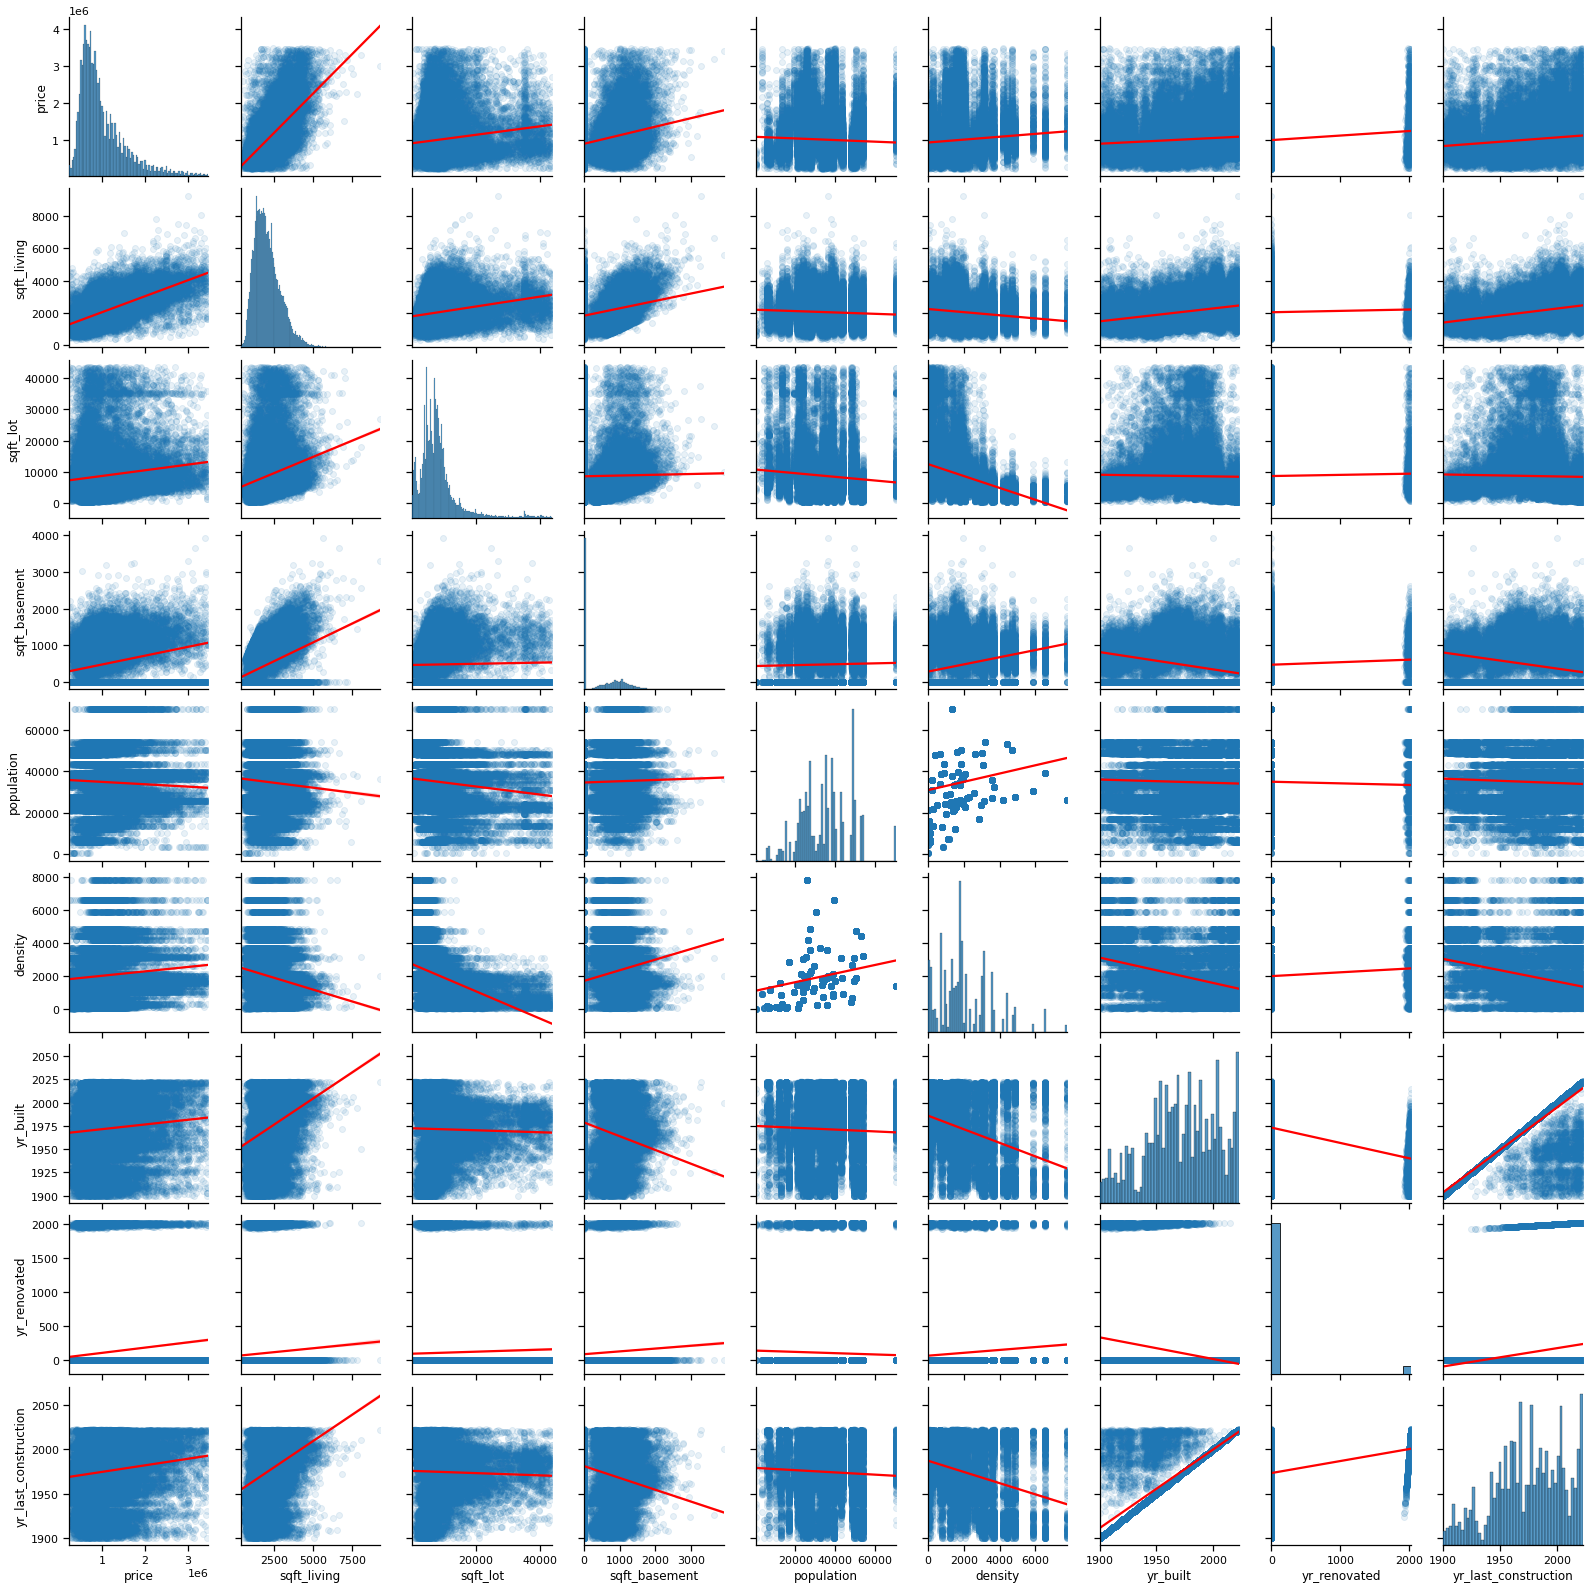

In [16]:
# Visualizing numerical data with a pairplot
sns.pairplot(data=df[pair], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

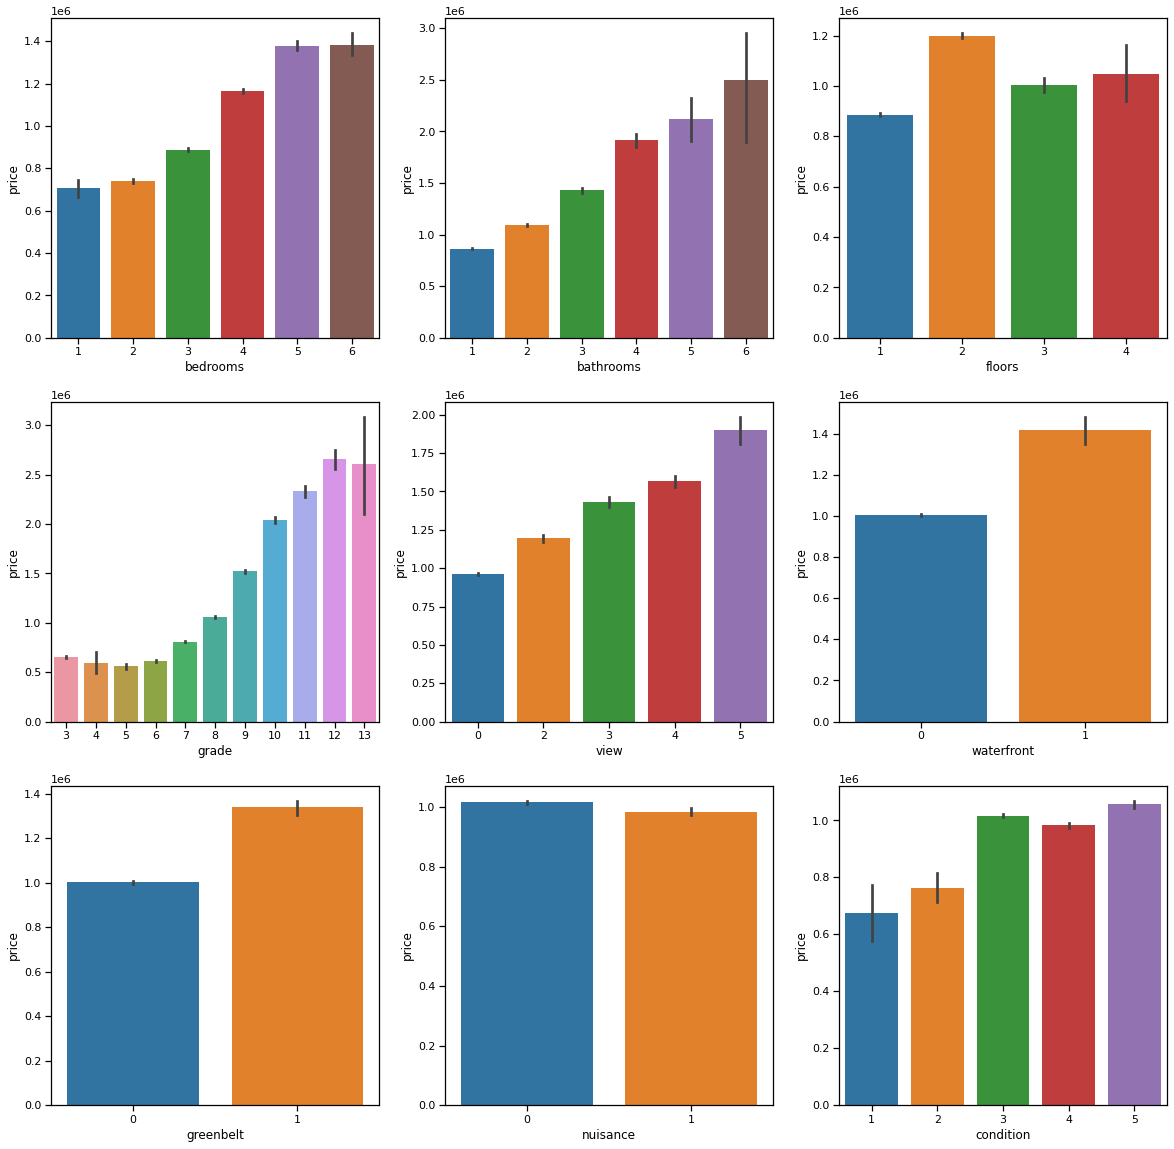

In [24]:
# Visualizing categorical data with barcharts
fig,ax=plt.subplots(3,3,figsize=[20,20])
for i,j in enumerate(barbox):
    col = i%3
    row = i//3
    axis = ax[row][col]
    sns.barplot(data=df, y='price', x=j, ax=axis)

# Based on the below graphs, the following variables appear to be correlated with 
# price and will be selected for modeling: waterfront, greenbelt, view, zipcode

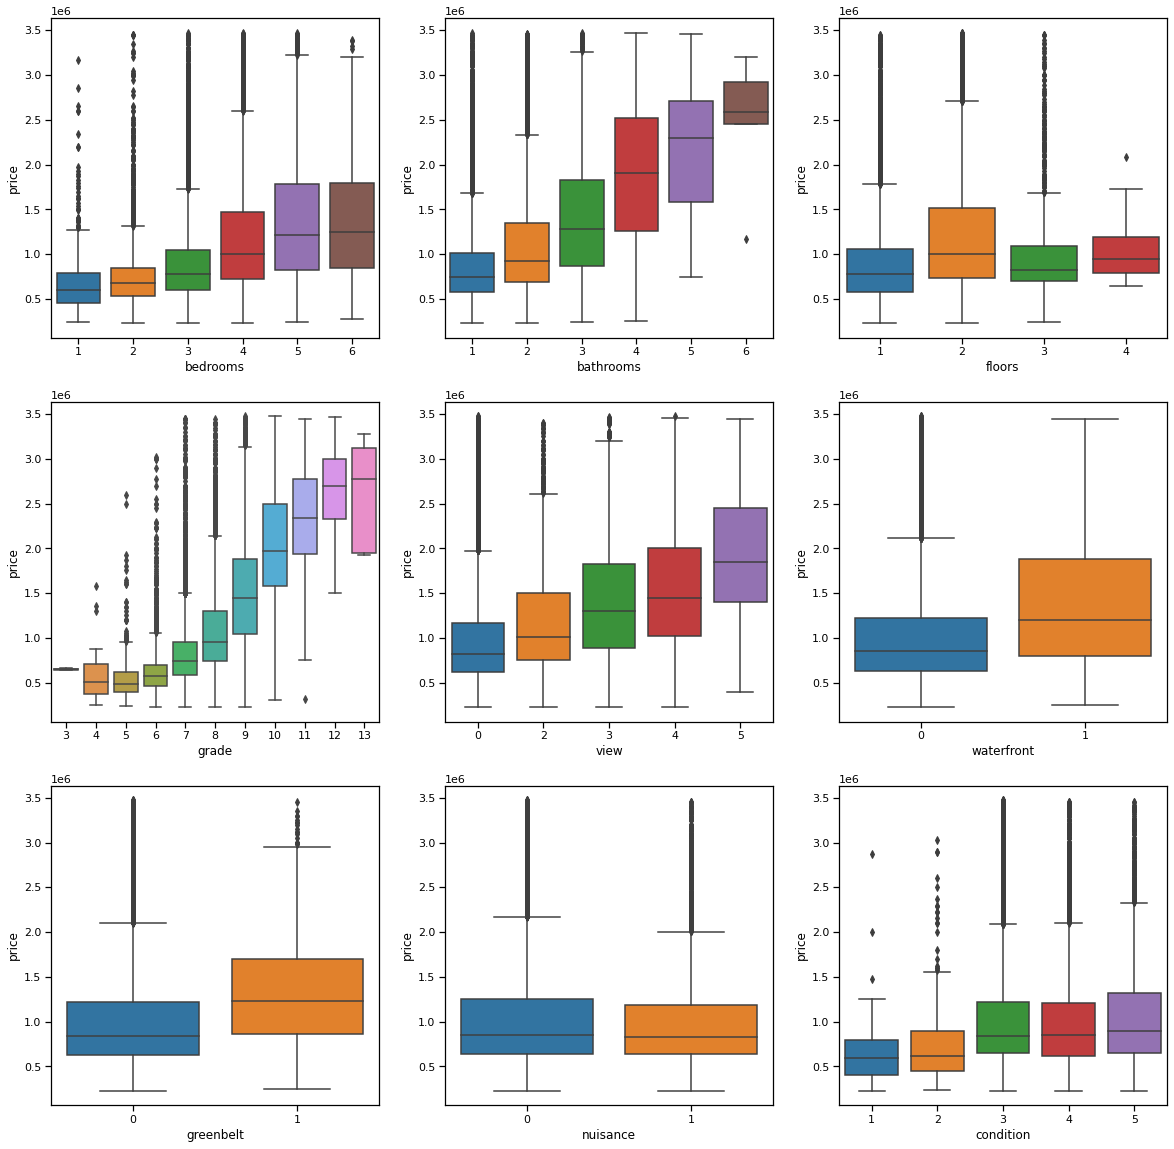

In [31]:
# Visualizing categorical data with box plots.
fig,ax=plt.subplots(3,3,figsize=[20,20])
for i,j in enumerate(barbox):
    col = i%3
    row = i//3
    axis = ax[row][col]
    sns.boxplot(data=df, y='price', x=j, ax=axis)

# Correlations

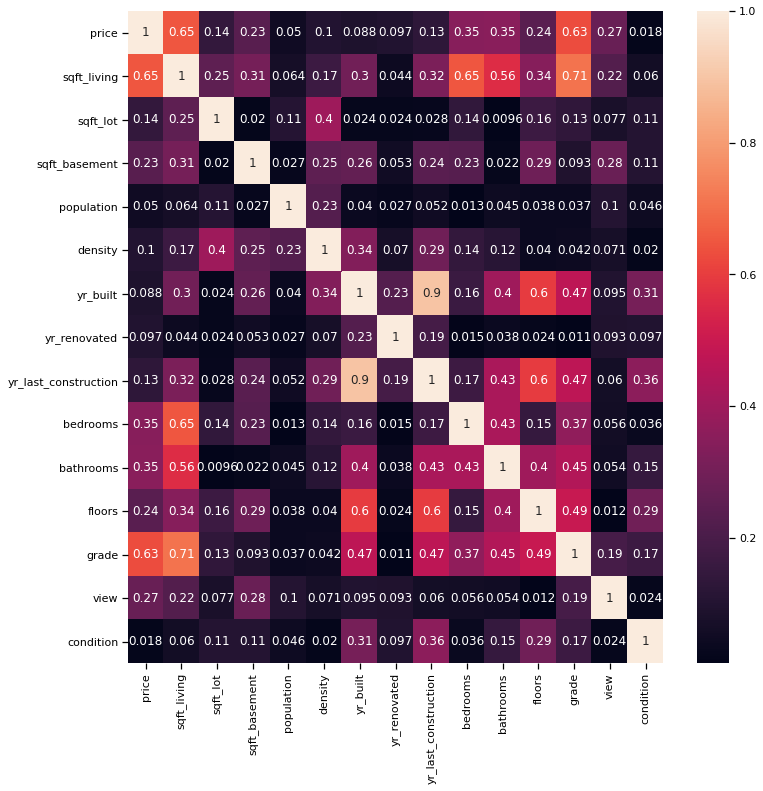

In [38]:
# Making a heatmap to visualize correlations between variables.
heat = [
    'price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'population',
    'density', 'yr_built', 'yr_renovated', 'yr_last_construction', 'bedrooms',
    'bathrooms', 'floors', 'grade', 'view', 'condition'
]
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[heat].corr().abs(), annot=True, ax=ax);

In [39]:
# Sorting the numerical variables by their correlation to price.  
price_corr = df[pair+barbox].corr()['price'].sort_values(ascending=False)
price_corr = price_corr[price_corr.between(.2,.99)]
price_corr

# To select numerical features, I set a threashold of a correlation of 0.2. 

sqft_living      0.648437
grade            0.630134
bathrooms        0.352476
bedrooms         0.349908
view             0.274509
floors           0.238458
sqft_basement    0.234725
Name: price, dtype: float64

In [13]:
# Looking for multicollinearity by sorting pair-wise correlations between numerical variables.  
corr_df = df[pair[1:]+barbox].corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df.index = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.rename(columns={0:'corr'},inplace=True)
corr_df = corr_df[corr_df['corr'].between(.5,.99)]
corr_df.drop_duplicates(subset=['corr'],inplace=True)
corr_df
# Since sqft_living and grade have a correlation above 0.7, I will not include both in my model
# to avoid multicollinearity. Since sqft_living is more correlated with price, we will drop grade.

,corr
"(yr_built, yr_last_construction)",0.896408
"(grade, sqft_living)",0.708051
"(sqft_living, bedrooms)",0.648588
"(yr_built, floors)",0.597563
"(floors, yr_last_construction)",0.595929
"(bathrooms, sqft_living)",0.560905


Based on the correlations, I decided to include `sqft_living`, `bathrooms`, `bedrooms`, `view`,  `floors`,  `sqft_basement` as predictors of `price`. I excluded `grade` as its correlation with `sqft_living` is greater than 0.7 and is less correlated with `price`.

Based on the visual, I decided to include `waterfront` and `greenbelt`. 

Lastly, I decided to include `zipcode`, to account for changes in price based on location of the property.